In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Part 1: Prepare the Data

In [2]:
file = Path('myopia.csv')

In [3]:
df = pd.read_csv(file, index_col=0)
df.head()

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
AGE,,,,,,,,,,,,,,
6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# Remove the "MYOPIC" column from the dataset.
df["MYOPIC"].nunique()

2

In [5]:
df = df.drop("MYOPIC", axis=1)
df.head()

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
AGE,,,,,,,,,,,,,
6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [6]:
# drop null values
df = df.dropna(axis=0, how='any')
df.shape

(618, 13)

In [8]:
# Standardize your dataset so that columns that contain larger values do not influence 
#the outcome more than columns with smaller values.

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

X_scaled[0]

array([-1.3639169 , -0.89286146,  0.48378402, -0.28144315, -1.0197916 ,
        4.1506609 ,  1.69744958, -0.68931054, -0.67299591,  0.18405806,
        0.49830393,  0.98713773,  1.0032415 ])

# Part 2: Apply Dimensionality Reduction

In [9]:
# Perform dimensionality reduction with PCA.
pca = PCA(n_components=0.90)
prinComponents = pca.fit_transform(X_scaled)
prinComponents.shape

(618, 10)

In [11]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
# To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
tsne1 = TSNE(perplexity=50)
tsne1Features = tsne1.fit_transform(prinComponents)
tsne1Features.shape

/Users/Diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/Diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(618, 2)

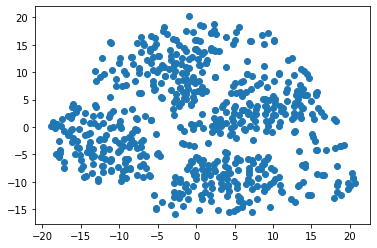

In [12]:
# Create a scatter plot of the t-SNE output.
x = tsne1Features[:,0]
y = tsne1Features[:,1]

plt.scatter(x,y)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

In [17]:
inertia = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for value in k:
    kmeans = KMeans(n_clusters = value, random_state=0)
    kmeans.fit(prinComponents)
    inertia.append(kmeans.inertia_)

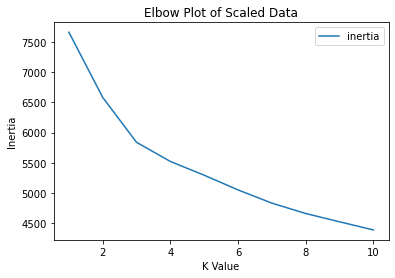

In [18]:
# create elbow plot
elbowPlot = pd.DataFrame({'K': k, "inertia": inertia})
elbowPlot.plot.line(x='K', y="inertia")
plt.ylabel("Inertia")
plt.xlabel("K Value")
plt.title("Elbow Plot of Scaled Data")
plt.show()

# Part 4: Make a Recommendation

Findings: After reducing the dataset with t-SNE, there were 4 main distinguishable clusters, so it was helpful. With the K-Means model, we can see a cluster pattern. However, in this model, more data is needed for further analysis.